# Анализ климатических изменений за последнии 100 лет

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from pandas import Series, DataFrame, read_csv
plt.style.use('ggplot')

%matplotlib inline

### Для анализа возьмем данные на территории США
Данные представляют помесячную выборку усредненную по все территории США в период с 1 января 1985г. по 1 январа 2018г.  
Источник: [National Climatic Data Center, U.S. Department of Commerce](https://www7.ncdc.noaa.gov/CDO/CDODivisionalSelect.jsp)

In [2]:
raw_df = read_csv('datasets/USA_1895_2018/usa_weather_1895_2018.csv')
df_info = read_csv('datasets/USA_1895_2018/columns.csv')
# clear column names
raw_df.columns = [col.strip() for col in raw_df.columns]

Посмотрим на имеющиеся данные

In [3]:
print "\nРазмер выборки: {}".format(raw_df.shape)
raw_df.head()


Размер выборки: (1488, 21)


,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,189501,3.32,26.69,1.47,1.47,4.42,1.47,6,...,1.80,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,16.52,36.86,NaN
1,110,0,189502,1.41,26.60,-0.45,0.87,-1.35,0.07,1,...,-1.70,0.50,-99.99,-99.99,-99.99,-99.99,-99.99,15.57,37.65,NaN
2,110,0,189503,1.99,39.97,-0.83,-0.83,-1.27,-0.83,13,...,-1.10,-2.09,-0.18,-99.99,-99.99,-99.99,-99.99,27.86,52.07,NaN
3,110,0,189504,1.99,52.90,-1.42,-1.42,-2.02,-1.42,27,...,-1.25,-1.63,-2.80,-99.99,-99.99,-99.99,-99.99,39.45,66.33,NaN
4,110,0,189505,2.88,59.94,0.04,-1.23,0.11,-1.09,88,...,-0.04,-0.78,-1.16,-99.99,-99.99,-99.99,-99.99,47.05,72.81,NaN


Для описания данных приведем рассшифровку имеющихся коллонок.  
Значения колонок CDD и HDD расчитываются относительно среднесуточной температуры 18°C (65°F)

In [4]:
df_info

,Column,Description
0,PCP,Precipitation Index
1,TAVG,Temperature Index
2,TMIN,Minimum Temperature Index
3,TMAX,Maximum Temperature Index
4,PDSI,Palmer Drought Severity Index
5,PHDI,Palmer Hydrological Drought Index
6,ZNDX,Palmer Z-Index
7,PMDI,Modified Palmer Drought Severity Index
8,CDD,Cooling Degree Days
9,HDD,Heating Degree Days


Проведем быстрый анализ данних на валидность и отсутствие NaN значений.  
Сперва удалим последнюю 20ую колонки "Unnamed", которая явным образом попала в выборку по ошибке.

In [5]:
df = raw_df.iloc[:,:20]
if df.isnull().values.any():
    print("\nВ выборке имеются NaN значения. Необходимо обработать данные.")
else:
    print("\nВ выборке отсутствуют NaN значения.")
df.describe()


В выборке отсутствуют NaN значения.


,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
count,1488.0,1488.0,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,110.0,0.0,195656.500000,2.505302,52.212849,0.287836,0.264180,0.082433,0.250195,101.388441,384.885081,-0.003696,-0.071741,-0.140363,-0.345349,-0.547950,-0.749153,-1.550907,40.246855,64.173051
std,0.0,0.0,3580.660311,0.552952,15.361259,2.664772,2.784905,1.781842,2.650859,112.580508,330.181741,0.993559,2.777133,3.797464,5.870660,7.378651,8.622826,12.375596,14.371682,16.380742
min,110.0,0.0,189501.000000,0.540000,21.900000,-8.400000,-8.400000,-7.140000,-8.400000,1.000000,3.000000,-3.090000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,12.520000,31.260000
25%,110.0,0.0,192578.750000,2.140000,38.030000,-1.500000,-1.872500,-1.100000,-1.482500,10.000000,55.000000,-0.660000,-0.640000,-0.640000,-0.650000,-0.690000,-0.740000,-0.660000,27.012500,48.732500
50%,110.0,0.0,195656.500000,2.510000,52.845000,0.670000,1.050000,0.105000,0.650000,41.000000,309.500000,0.000000,0.020000,-0.030000,-0.005000,0.010000,0.050000,0.000000,40.255000,65.345000
75%,110.0,0.0,198734.250000,2.880000,66.835000,2.240000,2.362500,1.252500,2.190000,186.000000,690.500000,0.660000,0.580000,0.630000,0.650000,0.640000,0.610000,0.640000,54.055000,79.795000
max,110.0,0.0,201812.000000,4.440000,76.800000,6.500000,6.500000,6.900000,6.500000,404.000000,1184.000000,3.090000,3.090000,3.090000,2.770000,3.090000,2.670000,2.470000,63.550000,90.840000


Удалим неинформативные колонки из представленной выборки данных, таких как "StateCode" и "Division".
Как мы видим все данные являются валидными, за исключением наличия значений "-99.990000" в столбцах SP02-SP24 связанных Standard Precipitation Index, что обусловленно особенностью расчета этого индекса и требует для расчета от 2 до 24 месяцов соответственно. Проверим это предположение.

In [6]:
data = df.drop(["StateCode", "Division"], axis=1)
data.iloc[23:].describe()

,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,HDD,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,195752.305802,2.506532,52.218635,0.292273,0.271973,0.082621,0.256218,101.352218,384.762457,-0.000532,0.001106,0.000799,-0.002362,-0.003010,-0.003843,-0.005447,40.254348,64.177201
std,3525.377025,0.552564,15.353296,2.683609,2.803683,1.784576,2.669068,112.608819,329.902164,0.992756,0.997940,0.997049,0.986607,0.980973,0.981587,0.966346,14.362524,16.374074
min,189612.000000,0.540000,21.900000,-8.400000,-8.400000,-7.140000,-8.400000,1.000000,3.000000,-3.090000,-3.090000,-3.090000,-3.090000,-2.540000,-2.470000,-2.480000,12.520000,31.260000
25%,192706.000000,2.140000,38.030000,-1.520000,-1.890000,-1.090000,-1.540000,10.000000,55.000000,-0.650000,-0.640000,-0.630000,-0.640000,-0.670000,-0.680000,-0.630000,27.030000,48.790000
50%,195712.000000,2.510000,52.860000,0.700000,1.080000,0.100000,0.680000,41.000000,309.000000,0.000000,0.020000,-0.030000,0.010000,0.020000,0.060000,0.010000,40.280000,65.350000
75%,198806.000000,2.880000,66.830000,2.270000,2.390000,1.260000,2.230000,185.000000,690.000000,0.660000,0.600000,0.640000,0.660000,0.650000,0.630000,0.650000,54.050000,79.790000
max,201812.000000,4.440000,76.800000,6.500000,6.500000,6.900000,6.500000,404.000000,1184.000000,3.090000,3.090000,3.090000,2.770000,3.090000,2.670000,2.470000,63.550000,90.840000


Возьмем температурные показатели из выборки и перестроим таблицы по годам.  
Для удобства работы с температурой переведем значения за градусов по Фаренгейту в градусы Цельсия.

In [7]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

def build_month_table(df, Col):
    new_df = pd.DataFrame({'Year': df.iloc[::12].YearMonth//100}).reset_index(drop=True)
    for i, month in enumerate(months):
        new_df[month] = df.iloc[i::12][Col].reset_index(drop=True)
    return new_df

def conver_F_to_C(df):
    """Convert temperature from Fahrenheit to Celsius scale."""
    return (5./9)*(df - 32)

def conver_F_to_C_by_month(df):
    df.iloc[:,1:] = conver_F_to_C(df.iloc[:,1:]).round(2)
    return df

def calculate_avg_by_month(df):
    return df.iloc[:, 1:13].mean(axis=1).round(2)

def calculate_count_by_month(df):
    return df.iloc[:, 1:13].sum(axis=1)
   
# Calculate for TAVG, TMIN, TMAX
term_avg = build_month_table(data, 'TAVG')
term_min = build_month_table(data, 'TMIN')
term_max = build_month_table(data, 'TMAX')

term_avg = conver_F_to_C_by_month(term_avg)
term_min = conver_F_to_C_by_month(term_min)
term_max = conver_F_to_C_by_month(term_max)

term_avg['AVG'] = calculate_avg_by_month(term_avg)
term_min['AVG'] = calculate_avg_by_month(term_min)
term_max['AVG'] = calculate_avg_by_month(term_max)

# Calculate for CDD, HDD
cdd_days = build_month_table(data, 'CDD')
hdd_days = build_month_table(data, 'HDD')

cdd_days['TOTAL'] = calculate_count_by_month(cdd_days)
hdd_days['TOTAL'] = calculate_count_by_month(hdd_days)

После преобразований получим таблицы для каждого года разбитые по месяцам:
- Средняя температура
- Минимальная температура
- Максимальная температура

In [8]:
term_avg.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVG
0,1895,-2.95,-3.00,4.43,11.61,15.52,19.89,21.80,22.01,18.65,10.47,3.98,-0.16,10.19
1,1896,-0.29,1.69,3.35,11.30,16.92,21.05,23.16,22.37,17.19,11.06,3.51,1.97,11.11
2,1897,-2.13,0.77,3.77,10.64,16.21,20.06,22.98,21.86,19.11,12.84,4.95,-0.69,10.86
3,1898,-0.74,1.87,5.03,10.44,15.52,20.73,22.94,22.64,18.59,10.83,3.55,-1.85,10.80
4,1899,-1.29,-3.61,3.13,10.34,15.50,20.36,22.82,22.08,18.22,12.21,7.18,-0.21,10.56


### Анализ температурных рекордов

Проанализируем температурные максимумы и минимумы за этот период.  
Найдем температурные рекорды, а именно самые холодные и самые жаркий месяцы и их температурные показатели.

In [9]:
abs_month_temp = DataFrame(
    columns = ['Month', 'MinTermYear', 'MinTerm', 'MaxTermYear', 'MaxTerm'])

for month in months:
    idx_min = term_min[month].idxmin()
    idx_max = term_max[month].idxmax()
    row = Series([month,
                  term_min['Year'].iloc[idx_min],
                  term_min[month].iloc[idx_min],
                  term_max['Year'].iloc[idx_max],
                  term_max[month].iloc[idx_max]],
                 index=abs_month_temp.columns)
    abs_month_temp = abs_month_temp.append(row, ignore_index=True)


idx_abs_min = abs_month_temp.MinTerm.idxmin()
idx_abs_max = abs_month_temp.MaxTerm.idxmax()

print("\nРекорды среднемесячной температуры: ")
print("\t- Минимум составил {}°C в {} {} года".format(
    abs_month_temp.MinTerm.iloc[idx_abs_min],
    abs_month_temp.Month.iloc[idx_abs_min],
    abs_month_temp.MinTermYear.iloc[idx_abs_min]))
print("\t- Максимум составил {}°C в {} {} года".format(
    abs_month_temp.MaxTerm.iloc[idx_abs_max],
    abs_month_temp.Month.iloc[idx_abs_max],
    abs_month_temp.MaxTermYear.iloc[idx_abs_max]))
print("\n(усредненные по всей территории США в период с 1895 по 2018 года)")


abs_month_temp


Рекорды среднемесячной температуры: 
	- Минимум составил -10.82°C в JAN 1977 года
	- Максимум составил 32.69°C в JUL 1936 года

(усредненные по всей территории США в период с 1895 по 2018 года)


,Month,MinTermYear,MinTerm,MaxTermYear,MaxTerm
0,JAN,1977,-10.82,2006,9.80
1,FEB,1936,-9.89,1954,12.14
2,MAR,1965,-4.28,1910,17.28
3,APR,1920,1.91,2006,20.25
4,MAY,1917,6.12,1934,26.25
5,JUN,1917,11.75,1933,29.97
6,JUL,1924,14.65,1936,32.69
7,AUG,1950,13.61,2011,31.31
8,SEP,1918,9.31,1998,27.75
9,OCT,1917,2.49,1963,23.04


Из полученных результатах видно, что в 1917 году сразу три месяца(Май, Июнь и Октябрь) били самыми холодными месяцами.  
Можно предположить, что этот год может бить наиболее холодным по среднегодовой температуре.  
Проверим это предположение:

In [10]:
coldest_year = term_avg.sort_values(by='AVG').iloc[0]

print("Самым холодным годом является {}\nCреднегодовая температура составила {}°C".format(
    int(coldest_year.Year), int(coldest_year.AVG)))

Самым холодным годом является 1917
Cреднегодовая температура составила 10°C


Наше предполодение оказалось верным.

### Анализ среднегодовой температуры

Рассмотрим как изменилась температура.  
Для начала построим график изменения среднегодовой температеры.  
Для наглядности на этом же графике представим скользящая среднее.  


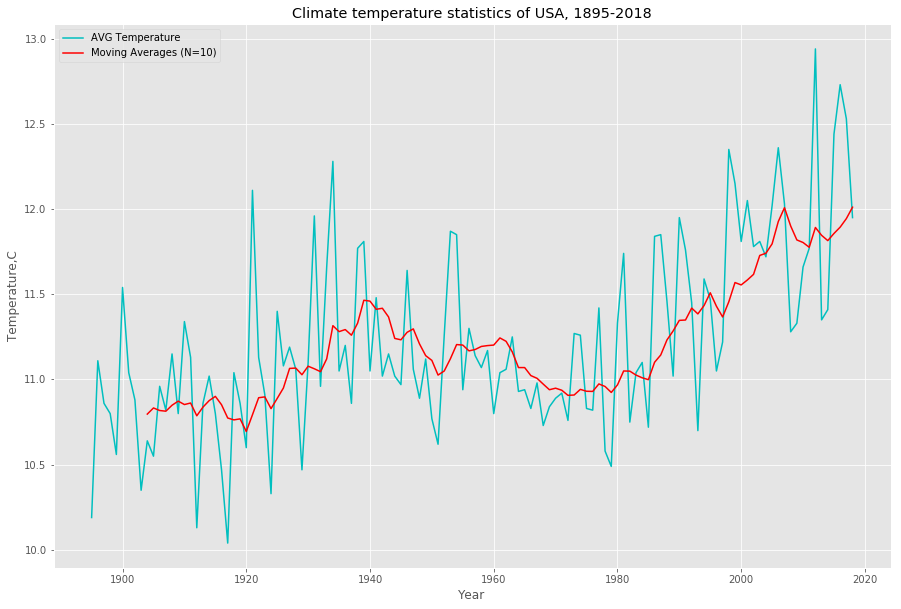

In [11]:
show_ma_5 = False

term_avg['MA_5'] = term_avg.AVG.rolling(5).mean()
term_avg['MA_10'] = term_avg.AVG.rolling(10).mean()

plt.figure(figsize=(15,10))
plt.grid(True)

plt.title('Climate temperature statistics of USA, 1895-2018')
plt.xlabel('Year')
plt.ylabel('Temperature,C')

plt.plot(
    term_avg.Year,
    term_avg.AVG,
    'c',
    label='AVG Temperature'
)
if show_ma_5:
    plt.plot(
        term_avg.Year,
        term_avg.MA_5,
        'b',
        label='Moving Averages (N=5)'
    )
else:
    plt.plot(
        term_avg.Year,
        term_avg.MA_10,
        'r',
        label='Moving Averages (N=10)'
    )

plt.legend(loc='best');
plt.show();

Согласно данным, представленным [NASA](https://climate.nasa.gov/vital-signs/global-temperature/), с 80х годов 20ого века наблидается общее повышение температуры Замли. Полученные результаты так же это подтверждают, однако только на основе этих данных нельзя сделать однозначных выводов.  

Сопоставим полученные данные и [данные](https://data.giss.nasa.gov/gistemp/graphs_v4/) NASA. Используемые данные NASA представляю изменение глобальной температуры поверхности относительно средних температур 1951-1980 годов. Чтобы сопоставить данные и отобразить их на одном графике, приведем их к необходимому формату.

In [12]:
nasa_global_temp_anomaly = read_csv('datasets/NASA/land-ocean_temperature_index.csv', skiprows=1)
nasa_global_temp_anomaly.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.23


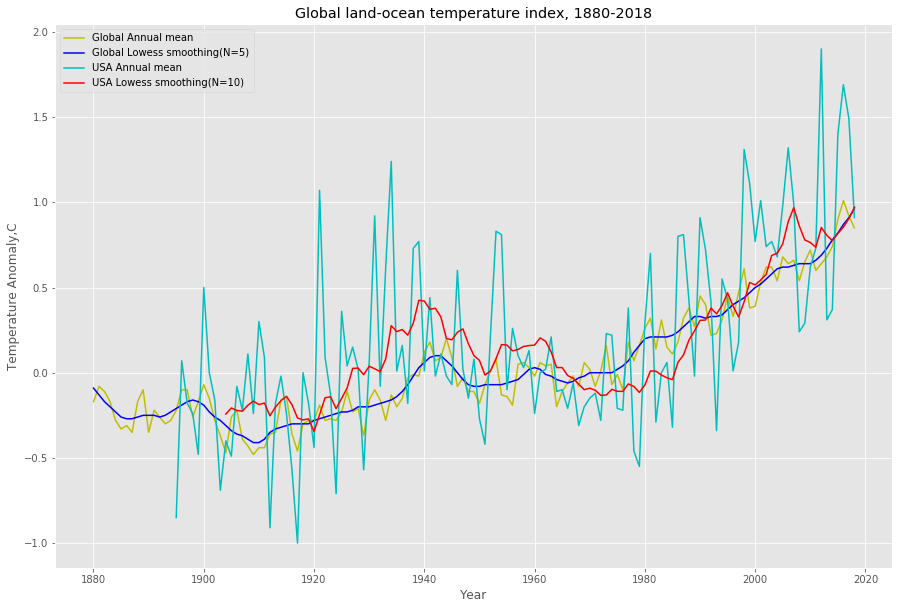

In [13]:
avg_mean_1951_1980 = term_avg.AVG.iloc[1951-1895:1981-1895].mean()

temp_anomaly = DataFrame({'Year': term_avg.Year,
                          'Anomaly': term_avg.AVG - avg_mean_1951_1980},
                         columns=['Year', 'Anomaly'])

temp_anomaly['MA_5'] = temp_anomaly.Anomaly.rolling(5).mean()
temp_anomaly['MA_10'] = temp_anomaly.Anomaly.rolling(10).mean()


show_ma_5 = False


plt.figure(figsize=(15,10))
plt.grid(True)

plt.title('Global land-ocean temperature index, 1880-2018')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly,C')

plt.plot(
    nasa_global_temp_anomaly['Year'],
    nasa_global_temp_anomaly['No_Smoothing'],
    'y',
    label='Global Annual mean'
)
plt.plot(
    nasa_global_temp_anomaly['Year'],
    nasa_global_temp_anomaly['Lowess(5)'],
    'b',
    label='Global Lowess smoothing(N=5)'
)
plt.plot(
    temp_anomaly['Year'],
    temp_anomaly['Anomaly'],
    'c',
    label='USA Annual mean'
)
if show_ma_5:
    plt.plot(
        temp_anomaly['Year'],
    temp_anomaly['MA_5'],
        'r',
        label='USA Lowess smoothing(N=5)'
    )
else:
    plt.plot(
        temp_anomaly['Year'],
    temp_anomaly['MA_10'],
        'r',
        label='USA Lowess smoothing(N=10)'
    )

plt.legend(loc='best');
plt.show();

По графику видно, что изменения среднегодовой температуры на территоррии США коррелируются с глабальными изменениями.

### Анализ осадков

Для анализа осаднов будем использовать стандартизированный индекс осадков(СИО).  
Индекс представляет собой безразмерное центральное отклонение (в данном случае это отклонение месячных сумм осадков от их среднего значения), выраженное числом среднеквадратических отклонений. Для анализа возмем 12и месячный СИО, так как хотим получить представление об изменениях количества осадков по годам. В изучаемой выборке это столбец SP12.

Значений индекса СИО:

| Индекс         | Значение          |
|:-------------:|:----------------:|
| 2,0+          | экстремально влажно |
| 1,5 – 1,99    | очень влажно       |
| 1,0 – 1,49    | умеренно влажно    |
| -0,99 – 0,99  | близко к норме     |
| -1,0 – -1,49  | умеренно сухо      |
| -1,5 – -1,99  | сильно сухо        |
| -2 и менее     | экстремально сухо   |

При расчете будем брать индекс, рассчитанный для декабря, так как он включает в себя данные об осадках с январа по декабря, и хорошо характеризует изучаемый год.

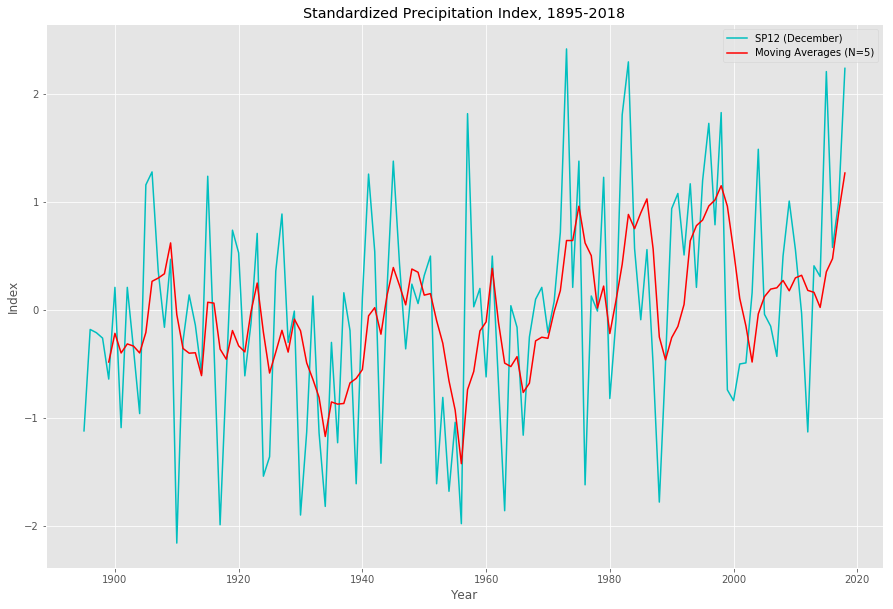

In [14]:
years_spi_12 = DataFrame({'Year': term_avg.Year,
                          'SP12': data.iloc[11::12].SP12.reset_index(drop=True)},
                         columns=['Year', 'SP12'])
years_spi_12['MA_5'] = years_spi_12.SP12.rolling(5).mean()


plt.figure(figsize=(15,10))
plt.grid(True)

plt.title('Standardized Precipitation Index, 1895-2018')
plt.xlabel('Year')
plt.ylabel('Index')

plt.plot(
    years_spi_12.Year,
    years_spi_12.SP12,
    'c',
    label='SP12 (December)'
)
plt.plot(
    years_spi_12.Year,
    years_spi_12.MA_5,
    'r',
    label='Moving Averages (N=5)'
)

plt.legend(loc='best');
plt.show();

Наблюдается тенденция повышения индекса осаднов начиная с 70х годов, уровень засухи в этот период должен был уменьшится относительно первой половины 20ого века.  

Выведем года, в которых индекс был выше 2 и соответствовал уровню экстремальной влажности:

In [15]:
years_spi_12.loc[years_spi_12.SP12 > 2, ['Year', 'SP12']].sort_values(by='SP12', ascending=False)

,Year,SP12
78,1973,2.42
88,1983,2.30
123,2018,2.24
120,2015,2.21


Все они пришлись на вторую половину 20ого века.  

Так же рассмотрим года, когда была сильная засуха( < -1,5):

In [16]:
years_spi_12.loc[years_spi_12.SP12 < -1.5, ['Year', 'SP12']].sort_values(by='SP12')

,Year,SP12
15,1910,-2.16
22,1917,-1.99
61,1956,-1.98
35,1930,-1.90
68,1963,-1.86
39,1934,-1.82
93,1988,-1.78
59,1954,-1.68
81,1976,-1.62
44,1939,-1.61


Их оказалось больше, но мы наперенно снизили порог фильтрации по индексу, чтобы результаты были наиболие полной.  
И опять же, тут еще лучше прослеживается тенденция уменьшения засухи на территории США.

### Итоги

Данный анализ носит сугубо информационный характер, а все расчеты приведены исключительно в ознакомительных целях. Для детального рассмотрения представленной темы требуется как минимум изучение данных для каждого отдельного штата, так как территория США является довольно обширной и имеет разные климатические зоны.

Подводя итог, можно сказать, что даже при таком анализе получильсь выявить климатические изменения, которые однозначно коррелируются с глобальными изменениями климата на нашей планете. И лично удостовериться в существовании проблеме глобального потепления.